In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Introducción a Seaborn

Seaborn es una biblioteca de python para la visualización de datos. Es muy utilizada en el ambiente del Análisis de datos y de muy fácil uso.
Nos permite crear buenas gráficas con pocas lineas de código.

### Personalización:

Si queremos mayor control o personalización podemos incluit Matplolib:
- Cambiar colores, tamaño o estilos.
- Añadir elementos avanzados como Títulos personalizados o escalas especfícas.


In [4]:
df_retail= pd.read_csv("data/retail_sales_dataset.csv", parse_dates=["Date"])
df_retail

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
...,...,...,...,...,...,...,...,...,...
995,996,2023-05-16,CUST996,Male,62,Clothing,1,50,50
996,997,2023-11-17,CUST997,Male,52,Beauty,3,30,90
997,998,2023-10-29,CUST998,Female,23,Beauty,4,25,100
998,999,2023-12-05,CUST999,Female,36,Electronics,3,50,150


### Gráfica de Barras

Calcularemos el total de ventas por género.

In [5]:
df_venta_total_por_Genero = df_retail.groupby("Gender")["Total Amount"].sum().reset_index()
df_venta_total_por_Genero.columns = ["Genero", "Venta Total"]
df_venta_total_por_Genero

,Genero,Venta Total
0,Female,232840
1,Male,223160


### Usando Barplot

Usamos 2 variables las cuales representaran en la gráfica el "eje X" y "eje Y"  
Luego hacemos el llamado a la funcion **barplot()**  


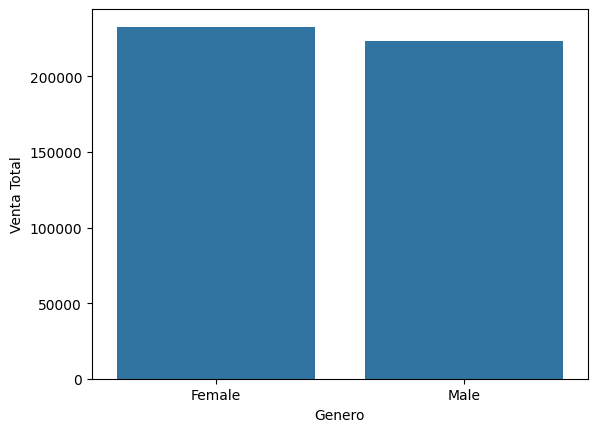

In [13]:
Genero = df_venta_total_por_Genero["Genero"]
Total = df_venta_total_por_Genero["Venta Total"]
ax = sns.barplot(x=Genero, y=Total)


### Barras Agrupadas

Nos permite comparar datos agrupadas por ya sea tiempo, Categorias, etc.

### PANDAS

En este caso vamos a comparar el total de ventas de Female y Male y este comparativo estará agrupado por Mes.
Entonces usando Pandas podemos realizar el cálculo respectivo.

1. En base a la fecha podemos obtener los meses y asignarlo en una nueva fila.
2. Usando **groupby()** podemos agruparlo por el Mes y El Gender y luego sumamos el Total Venta.


In [9]:
df_retail["Mes"] = df_retail["Date"].dt.month_name()
df_retail_meses = df_retail.groupby(["Mes","Gender"])["Total Amount"].sum().reset_index()
df_retail_meses.head()

,Mes,Gender,Total Amount
0,April,Female,17300
1,April,Male,16570
2,August,Female,22080
3,August,Male,14880
4,December,Female,25305


# Seaborn y Matplolib

En esta ocasión podemos usar Matploloib para darle una personalización a la gráfica.

1. Mejoramos el tamaño de la gráfica.
2. Usamos seaborn para crear la gráfica de barra agrupada:  
    2.1. Ejes: Asignamos las columnas respectivas para los ejes.  
    2.2. hue: Asignamos la columna que permitira graficar las barras agrupadas.  
    2.3. data: asigamos el dataframe que contiene los datos.

3. Personalizando el ejeX:  
    3.1. rotation: Damos una rotación al texto del eje x.   
    3.2. ha: permite darle una alineación en este caso a la derecha.  
    3.3. ax.get_xticklabels(): ayuda a que se seteen los las etiquetas que estamos utilizando como el de rotacion y ha.  

C:\Users\Joan\AppData\Local\Temp\ipykernel_12820\3996802820.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotación de 45° y alineación a la derecha


[Text(0, 0, 'April'),
 Text(1, 0, 'August'),
 Text(2, 0, 'December'),
 Text(3, 0, 'February'),
 Text(4, 0, 'January'),
 Text(5, 0, 'July'),
 Text(6, 0, 'June'),
 Text(7, 0, 'March'),
 Text(8, 0, 'May'),
 Text(9, 0, 'November'),
 Text(10, 0, 'October'),
 Text(11, 0, 'September')]

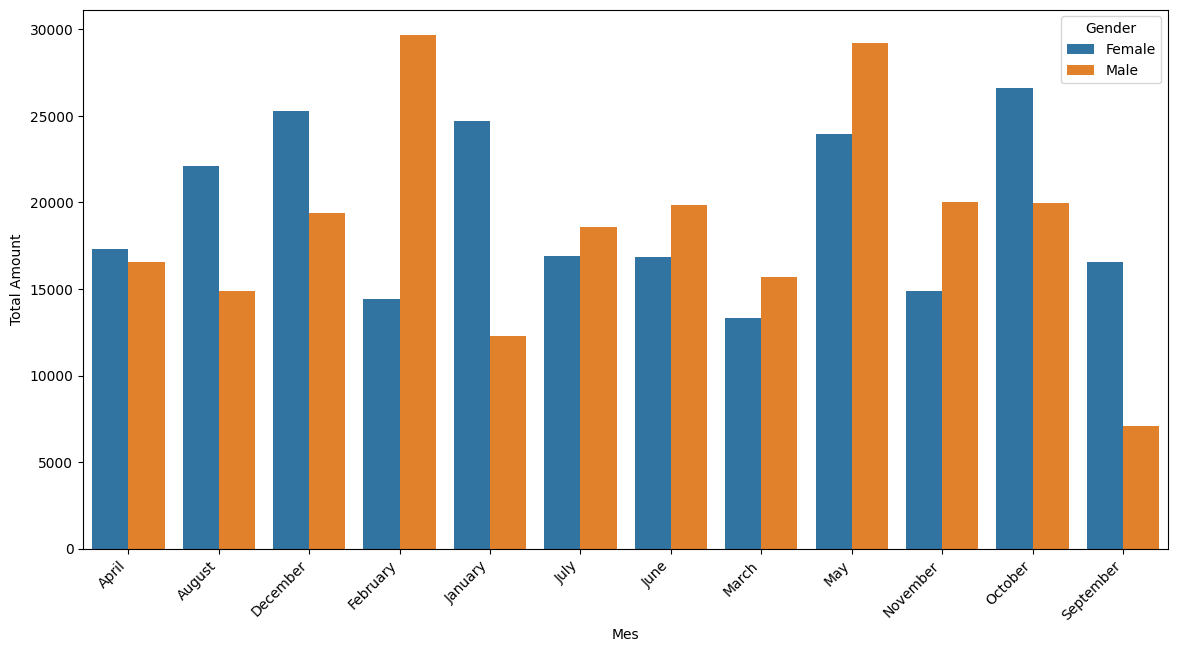

In [12]:

plt.figure(figsize=(14, 7))
ax = sns.barplot(x="Mes", y="Total Amount", hue="Gender", data=df_retail_meses)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")  # Rotación de 45° y alineación a la derecha
